<a href="https://colab.research.google.com/github/Tulasipotu08/hackathon/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/KNNAlgorithmDataset.csv.crdownload')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
282,89122,M,19.40,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.094640,...,28.65,152.40,1628.0,0.15180,0.37490,0.431600,0.225200,0.3590,0.07787,NaN
283,8912280,M,16.24,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.090520,...,25.09,126.90,1031.0,0.13650,0.47060,0.502600,0.173200,0.2770,0.10630,NaN
284,8912284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.033900,...,19.69,92.12,595.6,0.09926,0.23170,0.334400,0.101700,0.1999,0.07127,NaN
285,8912521,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,...,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431,NaN
286,8912909,B,11.94,20.76,77.87,441.0,0.08605,0.10110,0.00000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       287 non-null    int64  
 1   diagnosis                287 non-null    object 
 2   radius_mean              287 non-null    float64
 3   texture_mean             287 non-null    float64
 4   perimeter_mean           287 non-null    float64
 5   area_mean                287 non-null    float64
 6   smoothness_mean          287 non-null    float64
 7   compactness_mean         287 non-null    float64
 8   concavity_mean           287 non-null    float64
 9   concave points_mean      286 non-null    float64
 10  symmetry_mean            286 non-null    float64
 11  fractal_dimension_mean   286 non-null    float64
 12  radius_se                286 non-null    float64
 13  texture_se               286 non-null    float64
 14  perimeter_se             2

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
print(df.shape)

(287, 33)


In [11]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,2.870000e+02,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,286.000000,286.000000,...,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,0.0
mean,2.674071e+07,14.527059,19.417700,94.856098,692.303833,0.098448,0.112444,0.102003,0.055597,0.185525,...,26.095944,112.207378,958.003846,0.136387,0.280814,0.308549,0.126923,0.301920,0.086189,NaN
std,1.053053e+08,3.594813,4.305153,24.783047,359.458488,0.013785,0.056809,0.083483,0.039465,0.029063,...,6.380966,34.479592,580.318199,0.023389,0.173963,0.218518,0.067179,0.069974,0.020436,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.613500e+05,11.915000,16.365000,77.270000,438.100000,0.089455,0.070040,0.036810,0.023967,0.166700,...,21.392500,85.792500,543.950000,0.121750,0.153025,0.138500,0.072560,0.259525,0.072493,NaN
50%,8.750930e+05,13.740000,19.310000,88.590000,582.700000,0.097680,0.102900,0.084870,0.048670,0.183800,...,25.890000,105.400000,763.300000,0.136200,0.235100,0.274550,0.121800,0.289750,0.081490,NaN
75%,8.811651e+06,17.015000,21.965000,110.600000,901.800000,0.106800,0.143900,0.147350,0.083498,0.198950,...,30.287500,132.850000,1254.750000,0.150375,0.384475,0.422475,0.177575,0.330750,0.095528,NaN
max,8.810948e+08,28.110000,39.280000,188.500000,2499.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,49.540000,220.800000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [12]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          1
symmetry_mean                1
fractal_dimension_mean       1
radius_se                    1
texture_se                   1
perimeter_se                 1
area_se                      1
smoothness_se                1
compactness_se               1
concavity_se                 1
concave points_se            1
symmetry_se                  1
fractal_dimension_se         1
radius_worst                 1
texture_worst                1
perimeter_worst              1
area_worst                   1
smoothness_worst             1
compactness_worst            1
concavity_worst              1
concave points_worst         1
symmetry_worst               1
fractal_dimension_worst      1
Unnamed:

In [14]:
selected_feature=['area_mean','diagnosis']

In [15]:
x=df['area_mean']
y=df['diagnosis']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x.values.reshape(-1,1),y,test_size=0.2,random_state=30)

In [20]:
model=KNN()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred=model.predict(x_test)

In [25]:
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy}")

accuracy:0.8620689655172413


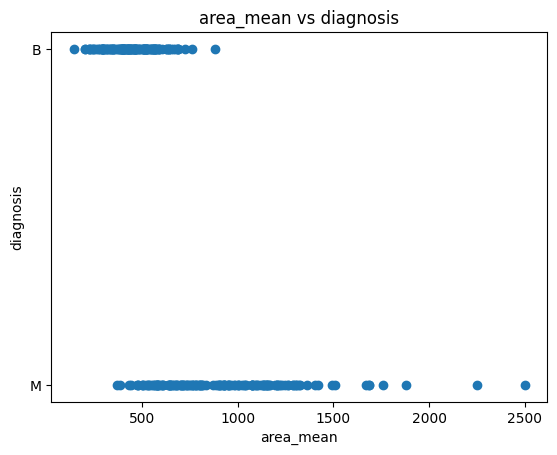

In [23]:
plt.scatter(df['area_mean'],df['diagnosis'])
plt.xlabel("area_mean")
plt.ylabel("diagnosis")
plt.title('area_mean vs diagnosis')
plt.show()